# Decision Tree Worksheet

In [ ]:
!pip install graphviz

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names=names)
data.head() 

# Splitting data
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=10, min_samples_leaf=2)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
# Printing accuracy of testing & training data
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred)*100, end = '%')
y_val_pred=decision_tree.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val,y_val_pred)*100, end = '%')

Training Accuracy: 83.09572301425662%
Validation Accuracy: 70.73170731707317%

Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=5, min_samples_leaf=3)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
# Printing accuracy of testing & training data
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy :", accuracy_score(y_train, y_train_pred)*100, end = '%')
y_val_pred=decision_tree.predict(X_val)
print("\nValidation Accuracy :", accuracy_score(y_val,y_val_pred)*100, end = '%')

Training Accuracy is  83.09572301425662
Validation Accuracy is  70.73170731707317


Explain the accuracy results below. 

Having a higher max-depth and lower minimum sample leafs in the decision tree algorithm caused overfitting. 

## Metrics

Plot the ROC curve and print the AUC of the second model.

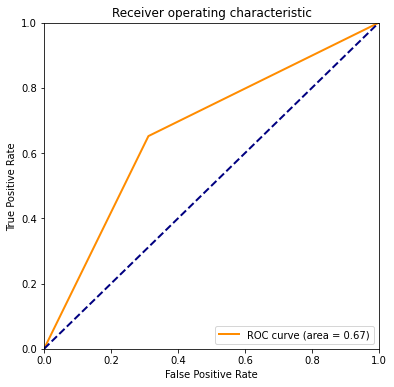

In [ ]:
## YOUR CODE HERE
labels = [0,1]
y_val_prob = decision_tree.predict_proba(X_val,labels)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

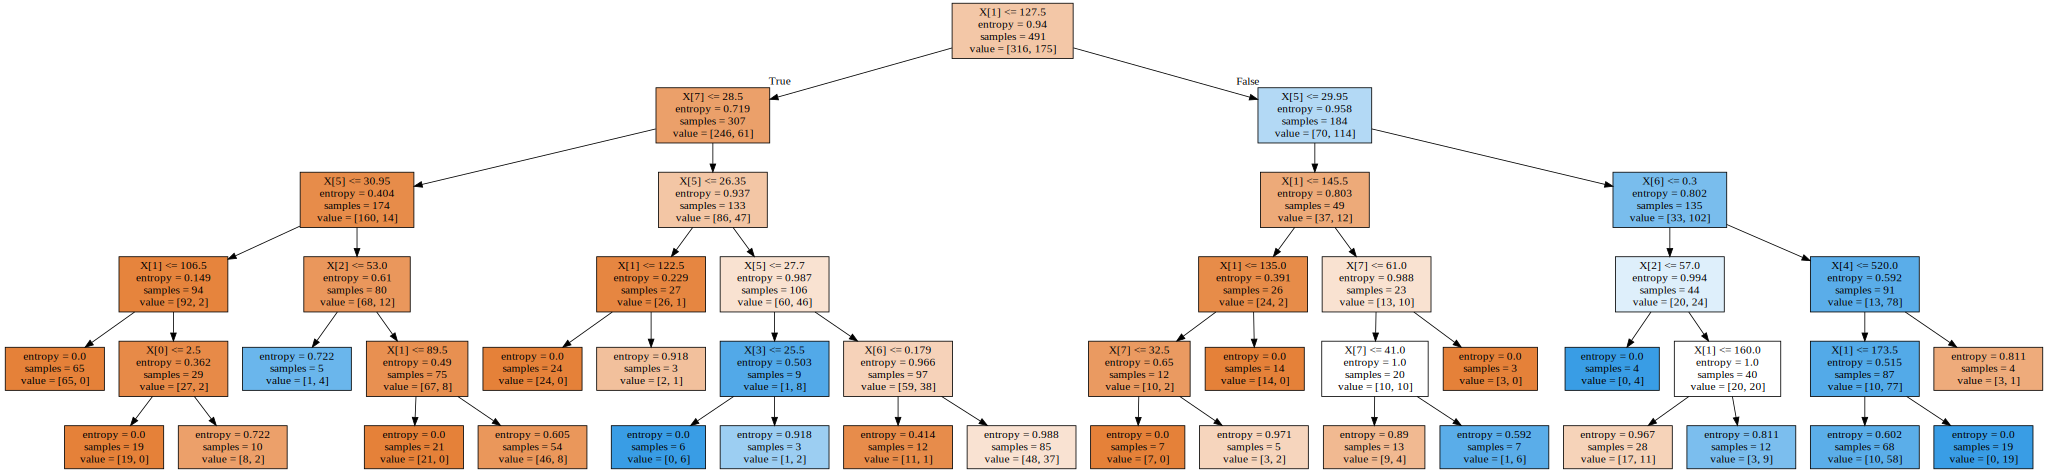

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

Xn should be representing the feature numbers in the nodes from the graph.

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is Plas <= 127.5. This makes sense as the root feature, because it is the most generic (highest correlation).

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

Test accuracy would decrease significantly, because the model would be overfitted to the training, as a result, the training accuracy would be high.



**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy :", accuracy_score(y_train, y_train_pred)*100, end = '%')
y_val_pred=decision_tree.predict(X_val)
print("\nValidation Accuracy :", accuracy_score(y_val,y_val_pred)*100, end = '%')
                            

Training Accuracy : 100.0%
Validation Accuracy : 67.47967479674797%

# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=30)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy :", accuracy_score(y_train, y_train_pred)*100, end = '%')
y_val_pred=random_forest.predict(X_val)
print("\nValidation Accuracy : ", accuracy_score(y_val,y_val_pred)*100, end = '%')

Training Accuracy : 99.79633401221996%
Validation Accuracy :  73.98373983739837%

How did the accuracy compare to the decision tree's accuracy?

For most n_estimator values, the training accuracy of the random forest algorithm was significantly high. However, the validation accuracy of the algorithm was comparatively low, which indicates that the model is overfitted. 

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
# ## YOUR CODE HERE
final = []
importances = random_forest.feature_importances_
print(importances) #X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
for i, v in enumerate(importances):
    final.append([v, i])
print(final)
finals = sorted(final)
print(finals)
finals[-3:]
# age, mass, plas

[0.09088435 0.23597879 0.08990443 0.06615671 0.06865464 0.17660261
 0.12690375 0.14491472]
[[0.0908843488427874, 0], [0.23597878750193543, 1], [0.08990442865110146, 2], [0.06615671120213976, 3], [0.06865464109265718, 4], [0.1766026094130591, 5], [0.12690374832806778, 6], [0.14491472496825192, 7]]
[[0.06615671120213976, 3], [0.06865464109265718, 4], [0.08990442865110146, 2], [0.0908843488427874, 0], [0.12690374832806778, 6], [0.14491472496825192, 7], [0.1766026094130591, 5], [0.23597878750193543, 1]]


[[0.14491472496825192, 7], [0.1766026094130591, 5], [0.23597878750193543, 1]]

Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

[0.8981670061099797, 0.9592668024439919, 0.9857433808553971, 0.9938900203665988, 0.9979633401221996, 0.9959266802443992, 1.0, 0.9979633401221996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9979633401221996, 1.0, 1.0, 1.0, 1.0]


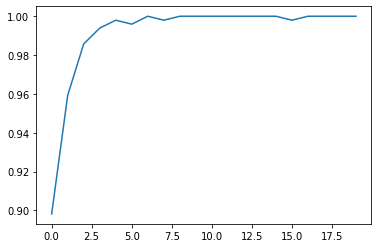

In [ ]:
## YOUR CODE HERE

#y_train_pred=random_forest.predict(X_train)
#print("Training Accuracy :", accuracy_score(y_train, y_train_pred)*100, end = '%')
#y_val_pred = random_forest.predict(X_val)
#print("\nValidation Accuracy :", accuracy_score(y_val,y_val_pred)*100, end = '%')

acc = []

for i in range(1,101,5): 
    random_forest = RandomForestClassifier(n_estimators= i)
    random_forest.fit(X_train, y_train)
    y_train_pred=random_forest.predict(X_train)
    y_val_pred=random_forest.predict(X_val)
    acc.append(accuracy_score(y_train, y_train_pred)) 
print(acc)
plt.plot(acc)



Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

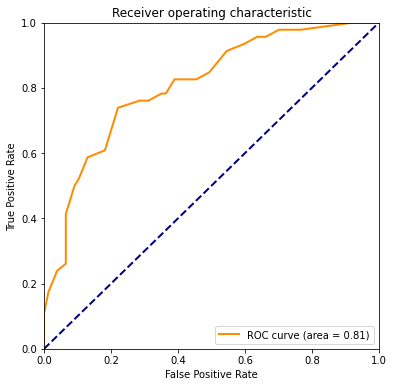

In [ ]:
## YOUR CODE HERE
#labels = [0,1]
y_val_prob = random_forest.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0e58ff94-2716-4c23-bc14-d1bdf69b13de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>